# Análisis tienda online internacional
___



**Nombre de la prueba**: recommender_system_test

**Propósito de la prueba**: Probar cambios relacionados con la introducción de un sistema de recomendaciones mejorado.

**Resultado esperado**: Dentro de los 14 días posteriores a la inscripción, los usuarios mostrarán una mejor conversión en vistas de la página del producto (el evento *product_page*), instancias de agregar artículos al carrito de compras (*product_cart*) y compras (*purchase*). 

En cada etapa del embudo *product_page* → *product_cart* → *purchase*, habrá al menos un **10% de aumento**.

In [1]:
#Se cargan las librerias a utilizar

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
import scipy.stats as stats
from scipy.stats import mannwhitneyu
import math

## Parte 1. Exploración de datos

In [2]:
#Se cargan los datasets
mkt_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

In [3]:
#Se revisa la información contenido en los datasets

display(mkt_events.info())
mkt_events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


None

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [4]:
#Se buscan valores ausentes

mkt_events.isna().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

In [5]:
#Se buscan valores duplicados

mkt_events.duplicated().sum()

0

In [6]:
#Se cambia el formato de la columna start_dt y finish_dt

mkt_events['start_dt'] = pd.to_datetime(mkt_events['start_dt'])
mkt_events['finish_dt'] = pd.to_datetime(mkt_events['finish_dt'])

display(mkt_events.info())
mkt_events.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


None

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [7]:
#Se revisa la información contenido en los datasets

display(new_users.info())
new_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


None

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [8]:
#Se buscan valores ausentes

new_users.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [9]:
#Se buscan valores duplicados

new_users.duplicated().sum()

0

In [10]:
#Se cambia el formato de la columna first_date

new_users['first_date'] = pd.to_datetime(new_users['first_date'])

display(new_users.info())
new_users.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


None

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [11]:
#Se revisa la información contenido en los datasets 

display(events.info())
events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


None

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [12]:
#Se buscan valores ausentes

events['details'].fillna(0.00, inplace = True)
events.isna().sum()

user_id       0
event_dt      0
event_name    0
details       0
dtype: int64

In [13]:
#Se buscan valores duplicados

events.duplicated().sum()

0

In [14]:
#Se cambia el formato de la columna event_dt y se agregan las columnas de la fecha y hora por separado

events['event_dt'] = pd.to_datetime(events['event_dt'])
events['date'] = events['event_dt'].dt.date 
events['time'] = events['event_dt'].dt.time
events['date'] = pd.to_datetime(events['date'])

display(events.info())
events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     423761 non-null  float64       
 4   date        423761 non-null  datetime64[ns]
 5   time        423761 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 19.4+ MB


None

,user_id,event_dt,event_name,details,date,time
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,20:22:03
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,09:22:53
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,12:59:29
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,04:02:40
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,10:15:09


In [15]:
#Se revisa la información contenido en los datasets

display(participants.info())
participants.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


None

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [16]:
#Se buscan valores ausentes

participants.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

In [17]:
#Se buscan valores duplicados

participants.duplicated().sum()

0

Despues de revisar la información de los datasets identificamos que en uno habia datos  faltantes en uno de ellos (*events* en la columna *details*) que se rellenaron con 0.00 ya que esa columna contiene el pedido total en USD para los eventos *purchase*, por lo que el rellenarlos con esa información no causa ningún problema.

Se detectó también que todas las fechas necesitaban convertir a date para poder realizar los filtros adecuados, despúes de haber hecho estos cambios seguiremos con el análisis exploratorio de datos.

## Parte 2. Lleva a cabo el análisis exploratorio de datos

### Se analiza la conversión en las diferentes etapas del embudo

In [18]:
# Se combinan los datasets de events con participants para tener los grupos

events_participants = events.merge(participants, on='user_id', how='inner')
events_participants.head()

,user_id,event_dt,event_name,details,date,time,group,ab_test
0,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,04:02:40,B,interface_eu_test
1,96F27A054B191457,2020-12-08 09:43:14,purchase,4.99,2020-12-08,09:43:14,B,interface_eu_test
2,96F27A054B191457,2020-12-09 00:44:10,purchase,4.99,2020-12-09,00:44:10,B,interface_eu_test
3,96F27A054B191457,2020-12-26 00:33:57,purchase,9.99,2020-12-26,00:33:57,B,interface_eu_test
4,96F27A054B191457,2020-12-07 04:02:41,product_page,0.00,2020-12-07,04:02:41,B,interface_eu_test


In [19]:
#Se filtran solo los eventos del embudo

funnel_events = ['product_page', 'product_cart', 'purchase']
funnel_data = events_participants[events_participants['event_name'].isin(funnel_events)]
funnel_data.head()

,user_id,event_dt,event_name,details,date,time,group,ab_test
0,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,04:02:40,B,interface_eu_test
1,96F27A054B191457,2020-12-08 09:43:14,purchase,4.99,2020-12-08,09:43:14,B,interface_eu_test
2,96F27A054B191457,2020-12-09 00:44:10,purchase,4.99,2020-12-09,00:44:10,B,interface_eu_test
3,96F27A054B191457,2020-12-26 00:33:57,purchase,9.99,2020-12-26,00:33:57,B,interface_eu_test
4,96F27A054B191457,2020-12-07 04:02:41,product_page,0.00,2020-12-07,04:02:41,B,interface_eu_test


In [20]:
#Se visializa la distribución básica

print("Distribución de eventos por grupo:")
print(funnel_data.groupby(['group', 'event_name']).size())

Distribución de eventos por grupo:
group  event_name  
A      product_cart     8023
       product_page    16669
       purchase         8619
B      product_cart     6295
       product_page    12292
       purchase         6235
dtype: int64


In [21]:
#Se calculan el número de eventos en los registros

funnel_data['event_name'].nunique()

3

In [22]:
#Se muetran los nombres de los eventos en los registros

funnel_data['event_name'].unique()

array(['purchase', 'product_page', 'product_cart'], dtype=object)

In [23]:
#Se calculan las cantidades de cada evento en los registros

funnel_data['event_name'].value_counts()

product_page    28961
purchase        14854
product_cart    14318
Name: event_name, dtype: int64

In [24]:
#Se calculan el número de usuarios en los registros

funnel_data['user_id'].nunique()

11405

In [25]:
#Se calcula el promedio de eventos por usuarios

len(funnel_data) / (funnel_data['user_id'].nunique())

5.097150372643577

In [26]:
#Se encuentran los rangos de fechas de los datos

print(funnel_data['date'].min())
print(funnel_data['date'].max())

2020-12-07 00:00:00
2020-12-30 00:00:00


<AxesSubplot:xlabel='date'>

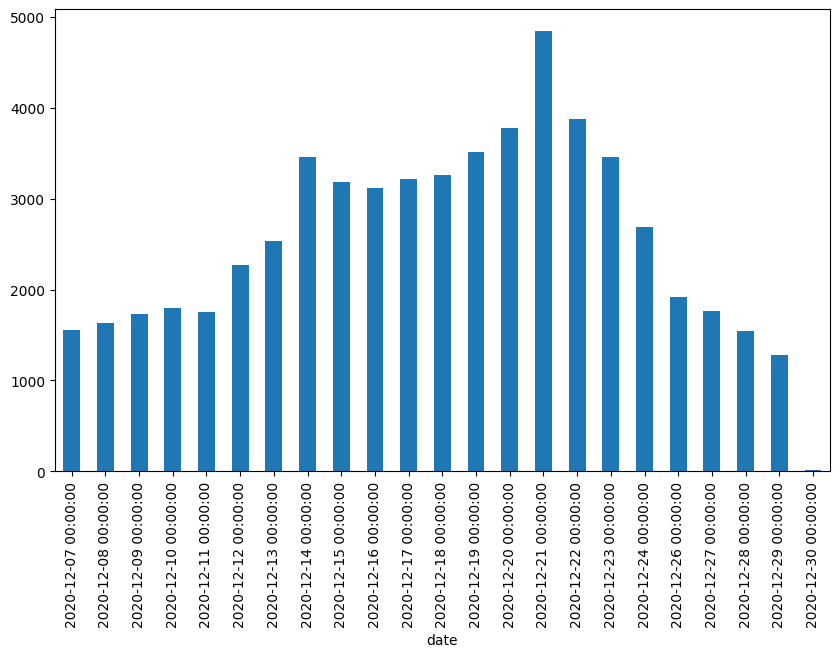

In [27]:

funnel_data.groupby(['date'])['user_id'].count().plot(
        figsize=(10, 6), 
        kind = 'bar')


In [28]:
#Se calculan los usuarios únicos por grupo

participants.groupby('group')['user_id'].nunique()

group
A    7874
B    6205
Name: user_id, dtype: int64

In [29]:
#Se filtra la información para tener unicamente los registros dentro del periodo indicado

funnel_data_filtered = funnel_data[(funnel_data['date'] >= '2020-12-07') & (funnel_data['date'] <= '2020-12-21')]
funnel_data_filtered.head()


,user_id,event_dt,event_name,details,date,time,group,ab_test
0,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,04:02:40,B,interface_eu_test
1,96F27A054B191457,2020-12-08 09:43:14,purchase,4.99,2020-12-08,09:43:14,B,interface_eu_test
2,96F27A054B191457,2020-12-09 00:44:10,purchase,4.99,2020-12-09,00:44:10,B,interface_eu_test
4,96F27A054B191457,2020-12-07 04:02:41,product_page,0.00,2020-12-07,04:02:41,B,interface_eu_test
5,96F27A054B191457,2020-12-08 09:43:18,product_page,0.00,2020-12-08,09:43:18,B,interface_eu_test


In [30]:
#Se calculan los eventos excluidos

len(funnel_data_filtered) / len(funnel_data)

0.7156176354222215

Se mantuvieron el *71.56%* de los eventos (registros) despúes de realizar el filto

In [31]:
#Se calculan los usuarios excluidos

funnel_data_filtered['user_id'].nunique() / funnel_data['user_id'].nunique()

0.9263480929416923

In [32]:
funnel_data_filtered['event_name'].nunique() / funnel_data_filtered['user_id'].nunique()

0.00028395646000946523

Se mantuvieron el *92.63%* de los usuarios despúes de realizar el filto

In [33]:
#Se verifican la nueva distribución después del filtro

print("Distribución de eventos por grupo (datos filtrados):")
print(funnel_data_filtered.groupby(['group', 'event_name']).size())

Distribución de eventos por grupo (datos filtrados):
group  event_name  
A      product_cart     5757
       product_page    11873
       purchase         6162
B      product_cart     4548
       product_page     8814
       purchase         4447
dtype: int64


In [34]:
#Se calculan los eventos de cada grupo experimental

funnel_data_filtered['group'].value_counts()

A    23792
B    17809
Name: group, dtype: int64

In [35]:
#Se calculan los usuarios únicos de cada grupo experimental

funnel_data_filtered.groupby(['group'])['user_id'].nunique()

group
A    6202
B    4701
Name: user_id, dtype: int64

In [36]:
# Se calculan los usuarios únicos por etapa y grupo

conversion_data = funnel_data_filtered.groupby(['group', 'event_name'])['user_id'].nunique().reset_index()
conversion_data.columns = ['group', 'event_name', 'unique_users']
print(conversion_data)

  group    event_name  unique_users
0     A  product_cart          2333
1     A  product_page          4872
2     A      purchase          2512
3     B  product_cart          1867
4     B  product_page          3645
5     B      purchase          1834


In [37]:
#Se crear una tabla pivotada para facilitar los cálculos

conversion_pivot = conversion_data.pivot(index='event_name', columns='group', values='unique_users')
print("Usuarios únicos por etapa:")
print(conversion_pivot)

Usuarios únicos por etapa:
group            A     B
event_name              
product_cart  2333  1867
product_page  4872  3645
purchase      2512  1834


In [38]:
# Se calculan las tasas de conversión para cada grupo

# Grupo A

page_to_cart_A = conversion_pivot.loc['product_cart', 'A'] / conversion_pivot.loc['product_page', 'A']
cart_to_purchase_A = conversion_pivot.loc['purchase', 'A'] / conversion_pivot.loc['product_cart', 'A']
overall_A = conversion_pivot.loc['purchase', 'A'] / conversion_pivot.loc['product_page', 'A']

# Grupo B

page_to_cart_B = conversion_pivot.loc['product_cart', 'B'] / conversion_pivot.loc['product_page', 'B']
cart_to_purchase_B = conversion_pivot.loc['purchase', 'B'] / conversion_pivot.loc['product_cart', 'B']
overall_B = conversion_pivot.loc['purchase', 'B'] / conversion_pivot.loc['product_page', 'B']

In [39]:
print("=== TASAS DE CONVERSIÓN ===")
print(f"Grupo A:")
print(f"  Página → Carrito: {page_to_cart_A:.1%}")
print(f"  Carrito → Compra: {cart_to_purchase_A:.1%}")
print(f"  General (Página → Compra): {overall_A:.1%}")
print()
print(f"Grupo B:")
print(f"  Página → Carrito: {page_to_cart_B:.1%}")
print(f"  Carrito → Compra: {cart_to_purchase_B:.1%}")
print(f"  General (Página → Compra): {overall_B:.1%}")

=== TASAS DE CONVERSIÓN ===
Grupo A:
  Página → Carrito: 47.9%
  Carrito → Compra: 107.7%
  General (Página → Compra): 51.6%

Grupo B:
  Página → Carrito: 51.2%
  Carrito → Compra: 98.2%
  General (Página → Compra): 50.3%


Al revisar la convertión por grupo detectmos que el A tiene una conversión del 107.7% Carrito → Compra. Necesitamos investigas a que se debe este dato antes de continuar con el análisis. 

In [40]:
#Se filtran los usuarios del grupo A

group_A = funnel_data_filtered[funnel_data_filtered['group'] == 'A']
group_A

,user_id,event_dt,event_name,details,date,time,group,ab_test
12,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,06:50:29,A,recommender_system_test
13,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,2020-12-09,02:19:17,A,recommender_system_test
14,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,2020-12-07,06:50:30,A,recommender_system_test
15,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,2020-12-08,10:52:27,A,recommender_system_test
16,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,2020-12-09,02:19:17,A,recommender_system_test
...,...,...,...,...,...,...,...,...
93848,10DCF8D58B8F33BA,2020-12-21 04:45:00,product_page,0.00,2020-12-21,04:45:00,A,interface_eu_test
93854,5A5520B7BDEF0885,2020-12-21 12:19:37,product_page,0.00,2020-12-21,12:19:37,A,interface_eu_test
93859,A35BD08F60AC00B8,2020-12-21 20:11:06,product_page,0.00,2020-12-21,20:11:06,A,interface_eu_test
93870,D67CECB678F0C900,2020-12-21 05:23:53,product_page,0.00,2020-12-21,05:23:53,A,interface_eu_test


In [41]:
#Se calculan los usuarios unicos que compraron sin agregar al carrito

group_A_purchase = (
    funnel_data_filtered[
        (funnel_data_filtered['group'] == 'A') &
        (funnel_data_filtered['event_name'] == 'purchase')
    ]['user_id']
    .nunique()
)
group_A_purchase

2512

In [42]:
#Se encuentran los usuarios unicos que compraron sin agregar al carrito

purchase_users_A = (
    funnel_data_filtered[
        (funnel_data_filtered['group'] == 'A') &
        (funnel_data_filtered['event_name'] == 'purchase')
    ]['user_id']
    .unique()
)
purchase_users_A

array(['831887FE7F2D6CBA', 'A92195E3CFB83DBD', '354D653172FF2A2D', ...,
       'AD5DBC5507D8D7B9', '909E771836E70C82', '676A58D41A3E0A47'],
      dtype=object)

In [43]:
#Se calculan los usuarios unicos que compraron agregando al carrito

group_A_cart = (
    funnel_data_filtered[
        (funnel_data_filtered['group'] == 'A') &
        (funnel_data_filtered['event_name'] == 'product_cart')
    ]['user_id']
    .nunique()
)
group_A_cart

2333

In [44]:
#Se encuentran los usuarios unicos que compraron agregando al carrito

cart_users_A = (
        funnel_data_filtered[
        (funnel_data_filtered['group'] == 'A') &
        (funnel_data_filtered['event_name'] == 'product_cart')
    ]['user_id']
    .unique()
)
cart_users_A

array(['831887FE7F2D6CBA', 'D8FBEA060A86A58D', '2B06EB547B7AAD08', ...,
       '086399E3A5AD93B8', 'F81FD538B1DC1DC9', '92865A8B9D8CD821'],
      dtype=object)

In [45]:
#Se convertien a sets los usuarios encontratos y encontrar la diferencia

purchase_set = set(purchase_users_A)
cart_set = set(cart_users_A)

In [46]:
#Se calculan los usuarios que compraron pero NO agregaron al carrito

users_purchase_no_cart = purchase_set - cart_set
len(users_purchase_no_cart)

1730

In [47]:
users_purchase_no_cart_list = list(users_purchase_no_cart)
print(f"Cantidad de usuarios que compraron sin carrito: {len(users_purchase_no_cart_list)}")
print(f"Primeros 5 usuarios: {users_purchase_no_cart_list[:5]}")

Cantidad de usuarios que compraron sin carrito: 1730
Primeros 5 usuarios: ['DC0A4AAA5A4BECA5', '0D6DFD473E339CB0', '7E63C62C7BE9AE22', '129F77C44A1FB534', '0915778760765805']


In [48]:
user_example = '570D3B2EFF6747A2'
user_events = funnel_data_filtered[funnel_data_filtered['user_id'] == user_example]
print(user_events[['event_dt', 'event_name', 'details']].sort_values('event_dt'))


                 event_dt event_name  details
26364 2020-12-16 22:06:21   purchase     9.99


In [49]:
user_example2 = '378BB5A704F525AF'

user_events = funnel_data_filtered[funnel_data_filtered['user_id'] == user_example2]
print(user_events[['event_dt', 'event_name', 'details']].sort_values('event_dt'))

                 event_dt    event_name  details
19829 2020-12-14 10:32:42      purchase     4.99
19833 2020-12-14 10:32:47  product_page     0.00
19830 2020-12-15 07:04:52      purchase     4.99
19834 2020-12-15 07:04:53  product_page     0.00


In [50]:
#Se analizan las compras de usuarios que compraron sin carrito

compras_sin_carrito = funnel_data_filtered[
    (funnel_data_filtered['user_id'].isin(users_purchase_no_cart_list)) & 
    (funnel_data_filtered['event_name'] == 'purchase')
]

#Se visualiza la distribución de valores

print("Distribución de valores de compra sin carrito:")
print(compras_sin_carrito['details'].value_counts().sort_index())


Distribución de valores de compra sin carrito:
4.99      3299
9.99       680
99.99      406
499.99      87
Name: details, dtype: int64


In [51]:
#Se Verificar si hay compras de $0.00 en todo el dataset
compras_cero = funnel_data_filtered[
    (funnel_data_filtered['event_name'] == 'purchase') & 
    (funnel_data_filtered['details'] == 0.00)
]
print(f"Compras de $0.00: {len(compras_cero)}")

Compras de $0.00: 0


Despúes de analizar los datos detectamos que en la información proporcionada hay **1,730** usuarios que compraron sin carrito tienen compras legítimas con valores reales

El **107%** de conversión del *Grupo A* es causado por un comportamiento de usuario válido, no por datos erróneos.

Con esta información podemos deducir que el problema no son datos "sucios" o erróneos, sino que el embudo tradicional (*product_page* → *product_cart* → *purchase*) no captura todos los flujos de compra posibles en esta aplicación.

Con esto en mente se podría sugerir redefinir nuestro embudo para incluir flujos alternativos, pensando que el gerente de producto le pudiera interesar más entender por qué algunos usuarios saltan el carrito.

La sugerencia sería evaluar dos flujos:

    Flujo tradicional: product_page → product_cart → purchase
    Flujo directo: product_page → purchase

Pensando estratégicamente sobre el balance entre proporcionar insights valiosos y ser práctico con los recursos disponibles; y considerando que el objetivo específico de esta prueba es evaluar si el sistema de recomendaciones mejorado logra "al menos un 10% de aumento en cada etapa del embudo *product_page* → *product_cart* → *purchase*", se seguira analizando el embudo tradicional según los requerimientos para después evaluar si los resultados son concluyentes.

Si despúes del análisis hay dudas, se justifica el análisis del embudo múltiple como valor agregado. Si no hay dudas, la sugerencia se dejara para que el cliente evalue si le interesa conocer ese embudo directo para hacerlo en una segunda fase.

In [52]:
#Se calculan usuarios únicos por evento y grupo

conversion_stats = funnel_data_filtered.groupby(['group', 'event_name'])['user_id'].nunique().reset_index()
conversion_stats = conversion_stats.pivot(index='group', columns='event_name', values='user_id')
print("Usuarios únicos por evento:")
print(conversion_stats)

Usuarios únicos por evento:
event_name  product_cart  product_page  purchase
group                                           
A                   2333          4872      2512
B                   1867          3645      1834


### Se analiza el número de eventos por usuario y si se distribuye de manera equitativa entre las muestras

In [53]:
#Se encuentran la cantidad de usuarios únicos por cada acción

funnel_data_filtered.groupby('event_name')['user_id'].nunique().sort_values(ascending = False)

event_name
product_page    8246
purchase        4219
product_cart    4074
Name: user_id, dtype: int64

In [54]:

#Se aalculan los eventos por usuario para cada grupo

events_per_user = funnel_data_filtered.groupby(['group', 'user_id']).size().reset_index(name='event_count')
print("Primeras filas de eventos por usuario:")
print(events_per_user.head(10))


Primeras filas de eventos por usuario:
  group           user_id  event_count
0     A  0002CE61FF2C4011            8
1     A  0010A1C096941592            6
2     A  002412F1EB3F6E38            3
3     A  002540BE89C930FB            6
4     A  003DF44D7589BBD4            8
5     A  004C58ADE7CA8C4A            4
6     A  0053DD654C9513D6            6
7     A  006E3E4E232CE760            2
8     A  00807760AE4F0504            1
9     A  0082295A41A867B5           12


In [55]:
#Se calculan las estadísticas descriptivas por grupo

print("=== ESTADÍSTICAS DE EVENTOS POR USUARIO ===")
print("\nGrupo A:")
group_a_stats = events_per_user[events_per_user['group'] == 'A']['event_count'].describe()
print(group_a_stats)

print("\nGrupo B:")
group_b_stats = events_per_user[events_per_user['group'] == 'B']['event_count'].describe()
print(group_b_stats)


=== ESTADÍSTICAS DE EVENTOS POR USUARIO ===

Grupo A:
count    6202.000000
mean        3.836182
std         2.733959
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        24.000000
Name: event_count, dtype: float64

Grupo B:
count    4701.000000
mean        3.788343
std         2.710201
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        24.000000
Name: event_count, dtype: float64


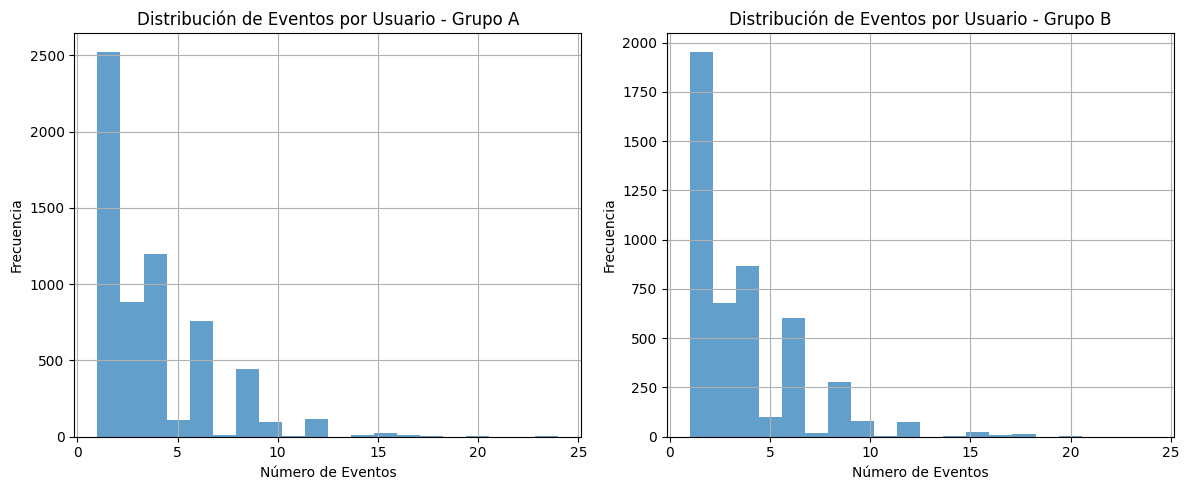

In [56]:
#Se crean histogramas comparativos

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma Grupo A

events_per_user[events_per_user['group'] == 'A']['event_count'].hist(bins=20, ax=ax1, alpha=0.7)
ax1.set_title('Distribución de Eventos por Usuario - Grupo A')
ax1.set_xlabel('Número de Eventos')
ax1.set_ylabel('Frecuencia')

# Histograma Grupo B

events_per_user[events_per_user['group'] == 'B']['event_count'].hist(bins=20, ax=ax2, alpha=0.7)
ax2.set_title('Distribución de Eventos por Usuario - Grupo B')
ax2.set_xlabel('Número de Eventos')
ax2.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Las distribuciones son prácticamente idénticas, lo que significa que no hay sesgo por usuarios más activos en ningún grupo.

In [57]:
#Se calculan comparas proporciones de usuarios por número de eventos

print("=== PROPORCIÓN DE USUARIOS POR NÚMERO DE EVENTOS ===")
prop_comparison = events_per_user.groupby(['group', 'event_count']).size().unstack(level=0, fill_value=0)
prop_comparison_pct = prop_comparison.div(prop_comparison.sum()) * 100
print(prop_comparison_pct.head(10))

=== PROPORCIÓN DE USUARIOS POR NÚMERO DE EVENTOS ===
group                A          B
event_count                      
1            14.011609  13.805573
2            26.652693  27.717507
3            14.205095  14.465007
4            19.284102  18.421612
5             1.805869   2.084663
6            12.286359  12.784514
7             0.193486   0.361625
8             5.578846   4.445863
9             1.547888   1.489045
10            1.580135   1.680494


Al analizar las proporciones podemos validar que son prácticamente idénticas, esto confirma que la randomización fue exitosa.

Con esto podemos concluir lo siguiente:

 - La distribución equitativa. Ambos grupos tienen patrones de actividad muy similares
 - No hay sesgo. Ningún grupo tiene usuarios significativamente más activos
 - Randomización exitosa. La asignación aleatoria funcionó correctamente
 - Validez del experimento. Podemos confiar en que las diferencias observadas se deben al tratamiento, no a diferencias en el comportamiento base de los usuarios


### Se evalúa la presencia de usuarios comunes en ambas muestras

In [58]:
#Se verifican usuarios únicos por grupo
print("=== VERIFICACIÓN DE USUARIOS COMUNES ===")

#Se obtenien usuarios únicos de cada grupo
users_group_a = set(funnel_data_filtered[funnel_data_filtered['group'] == 'A']['user_id'].unique())
users_group_b = set(funnel_data_filtered[funnel_data_filtered['group'] == 'B']['user_id'].unique())

print(f"Usuarios únicos en Grupo A: {len(users_group_a)}")
print(f"Usuarios únicos en Grupo B: {len(users_group_b)}")


=== VERIFICACIÓN DE USUARIOS COMUNES ===
Usuarios únicos en Grupo A: 6202
Usuarios únicos en Grupo B: 4701


In [59]:
#Se Verifican intersección (usuarios comunes)

common_users = users_group_a.intersection(users_group_b)
print(f"Usuarios comunes entre ambos grupos: {len(common_users)}")

Usuarios comunes entre ambos grupos: 338


Podemos ver que hay 338 usuarios comunes entre ambos grupos.

Para preserva la integridad del experimento y evitar sesgos por usuarios que experimentaron ambas versiones se decide eliminar los usuarios comunes. Esto es con el fin de mantener la independencia y asegurarnos que cada usuario restante pertenece únicamente a un grupo.

Esta medida es para evitar decisiones arbitrarias ya que no se tienen que elegir a qué grupo asignar cada usuario duplicado.

In [60]:
#Se eliminan usuarios comunes de ambos grupos

print("=== LIMPIEZA DE USUARIOS COMUNES ===")

#Se crear  dataset limpio sin usuarios duplicados

funnel_data_clean = funnel_data_filtered[
    ~funnel_data_filtered['user_id'].isin(common_users)
].copy()

print(f"Registros antes de la limpieza: {len(funnel_data_filtered)}")
print(f"Registros después de la limpieza: {len(funnel_data_clean)}")

=== LIMPIEZA DE USUARIOS COMUNES ===
Registros antes de la limpieza: 41601
Registros después de la limpieza: 39501


In [61]:
#Se verifican nuevos totales por grupo

users_clean_a = len(funnel_data_clean[funnel_data_clean['group'] == 'A']['user_id'].unique())
users_clean_b = len(funnel_data_clean[funnel_data_clean['group'] == 'B']['user_id'].unique())

print(f"\nUsuarios únicos finales:")
print(f"Grupo A: {users_clean_a}")
print(f"Grupo B: {users_clean_b}")


Usuarios únicos finales:
Grupo A: 5864
Grupo B: 4363


In [62]:
#Se aalculan los eventos por usuario para cada grupo sin usuarios comunes

events_per_user_clean = funnel_data_clean.groupby(['group', 'user_id']).size().reset_index(name='event_count')
print("Primeras filas de eventos por usuario clean:")
print(events_per_user_clean.head(10))

Primeras filas de eventos por usuario clean:
  group           user_id  event_count
0     A  0002CE61FF2C4011            8
1     A  0010A1C096941592            6
2     A  002412F1EB3F6E38            3
3     A  002540BE89C930FB            6
4     A  003DF44D7589BBD4            8
5     A  004C58ADE7CA8C4A            4
6     A  0053DD654C9513D6            6
7     A  006E3E4E232CE760            2
8     A  00807760AE4F0504            1
9     A  0093130DFBF1DC6A            6


In [63]:
#Se calculan las estadísticas descriptivas por grupo sin usuarios comunes

print("=== ESTADÍSTICAS DE EVENTOS POR USUARIO CLEAN ===")
print("\nGrupo A:")
group_a_stats_clean = events_per_user_clean[events_per_user_clean['group'] == 'A']['event_count'].describe()
print(group_a_stats_clean)


print("\nGrupo B:")
group_b_stats_clean = events_per_user_clean[events_per_user_clean['group'] == 'B']['event_count'].describe()
print(group_b_stats_clean)

=== ESTADÍSTICAS DE EVENTOS POR USUARIO CLEAN ===

Grupo A:
count    5864.000000
mean        3.878240
std         2.766946
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        24.000000
Name: event_count, dtype: float64

Grupo B:
count    4363.000000
mean        3.841164
std         2.753886
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        24.000000
Name: event_count, dtype: float64


In [64]:
#Se calculan comparas proporciones de usuarios por número de eventos sin usuarios comunes

print("=== PROPORCIÓN DE USUARIOS POR NÚMERO DE EVENTOS CLEAN ===")
prop_comparison_clean = events_per_user_clean.groupby(['group', 'event_count']).size().unstack(level=0, fill_value=0)
prop_comparison_pct_clean = prop_comparison_clean.div(prop_comparison_clean.sum()) * 100
print(prop_comparison_pct_clean.head(10))

=== PROPORCIÓN DE USUARIOS POR NÚMERO DE EVENTOS CLEAN ===
group                A          B
event_count                      
1            13.796044  13.499885
2            26.313097  27.343571
3            14.256480  14.554206
4            19.201910  18.244327
5             1.858799   2.177401
6            12.380628  12.949805
7             0.187585   0.366720
8             5.746930   4.584002
9             1.620055   1.581481
10            1.671214   1.810681


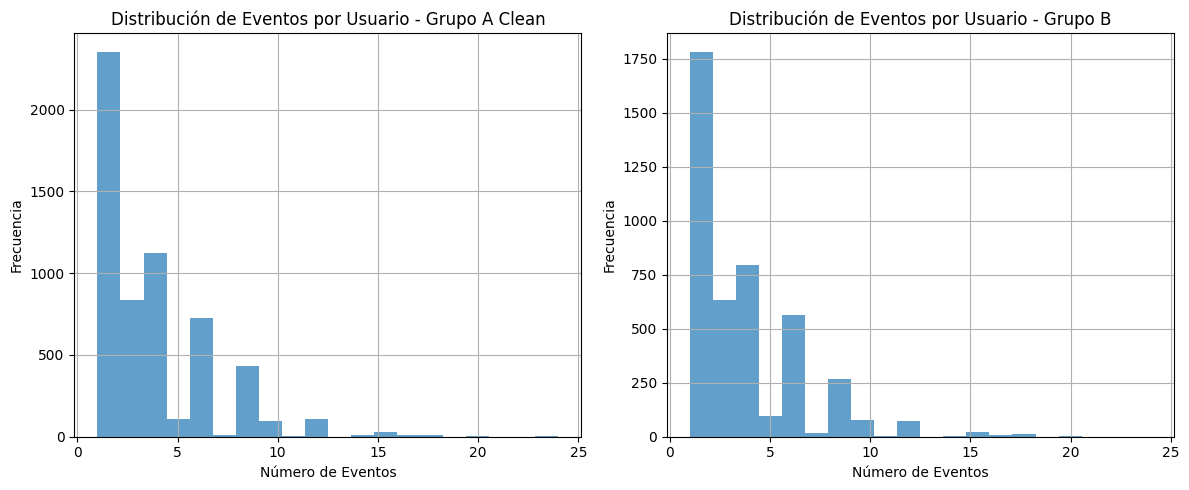

In [65]:
#Se crean histogramas comparativos sin usuarios comunes

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma Grupo A

events_per_user_clean[events_per_user_clean['group'] == 'A']['event_count'].hist(bins=20, ax=ax1, alpha=0.7)
ax1.set_title('Distribución de Eventos por Usuario - Grupo A Clean')
ax1.set_xlabel('Número de Eventos')
ax1.set_ylabel('Frecuencia')

# Histograma Grupo B

events_per_user_clean[events_per_user_clean['group'] == 'B']['event_count'].hist(bins=20, ax=ax2, alpha=0.7)
ax2.set_title('Distribución de Eventos por Usuario - Grupo B')
ax2.set_xlabel('Número de Eventos')
ax2.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Se realiza prueba estadística formal para confirmar la equidad

In [66]:
#Se obtenien eventos por usuario para cada grupo

events_a = events_per_user_clean[events_per_user_clean['group'] == 'A']['event_count']
events_b = events_per_user_clean[events_per_user_clean['group'] == 'B']['event_count']

In [67]:
#Se realiza Mann-Whitney U test

statistic, p_value = mannwhitneyu(events_a, events_b, alternative='two-sided')

print("=== MANN-WHITNEY U TEST ===")
print(f"Estadístico U: {statistic}")
print(f"P-valor: {p_value:.6f}")
print(f"Nivel de significancia: 0.05")

if p_value > 0.05:
    print("✅ NO hay diferencia significativa entre las distribuciones")
    print("✅ Los grupos están distribuidos equitativamente")
else:
    print("❌ SÍ hay diferencia significativa entre las distribuciones")

=== MANN-WHITNEY U TEST ===
Estadístico U: 12892303.0
P-valor: 0.490997
Nivel de significancia: 0.05
✅ NO hay diferencia significativa entre las distribuciones
✅ Los grupos están distribuidos equitativamente


Despues de realizar el test Mann-Whitney confirma que después de limpiar los datos eliminando usuarios contaminados, los grupos A y B están correctamente balanceados y distribuidos equitativamente.

### Se examina la distribución del número de eventos a lo largo de los días

In [68]:
#Se limpia el data set original para poder graficar los eventyos a lo largo de los días

events_clean = events[
    ~events['user_id'].isin(common_users)
].copy()

In [69]:
#Se filtra la información para tener unicamente los registros dentro del periodo indicado


events_clean_filtered = events_clean[
    (events_clean['date'] >= '2020-12-07') & 
    (events_clean['date'] <= '2020-12-21') &
    (events_clean['event_name'].isin(['product_page', 'product_cart', 'purchase']))
]


<AxesSubplot:title={'center':'Distribución de Eventos por día'}, xlabel='Fecha', ylabel='Número de Eventos'>

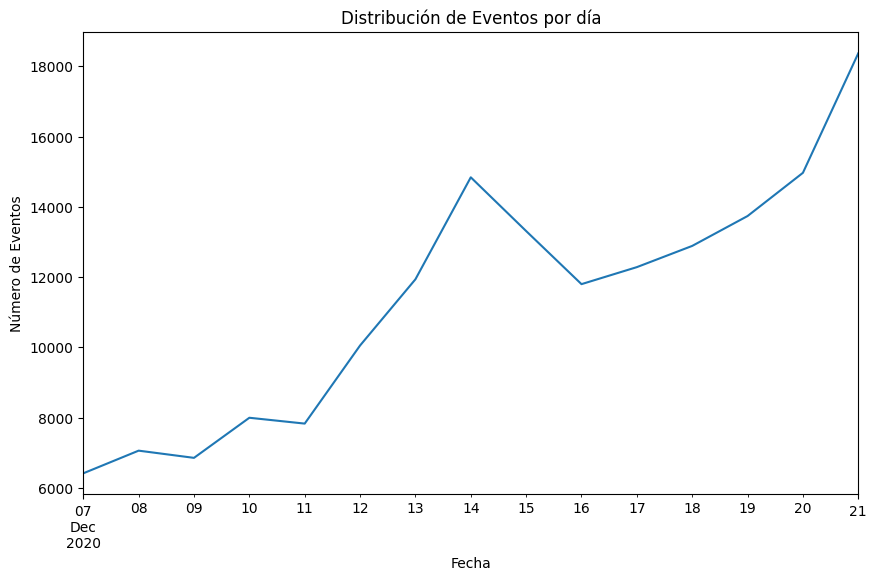

In [70]:
#Se realiza gráfica

events_clean_filtered.groupby(['date'])['user_id'].count().plot(
        figsize=(10, 6), 
        kind = 'line',
        title = 'Distribución de Eventos por día',
        xlabel = 'Fecha',
        ylabel = 'Número de Eventos')

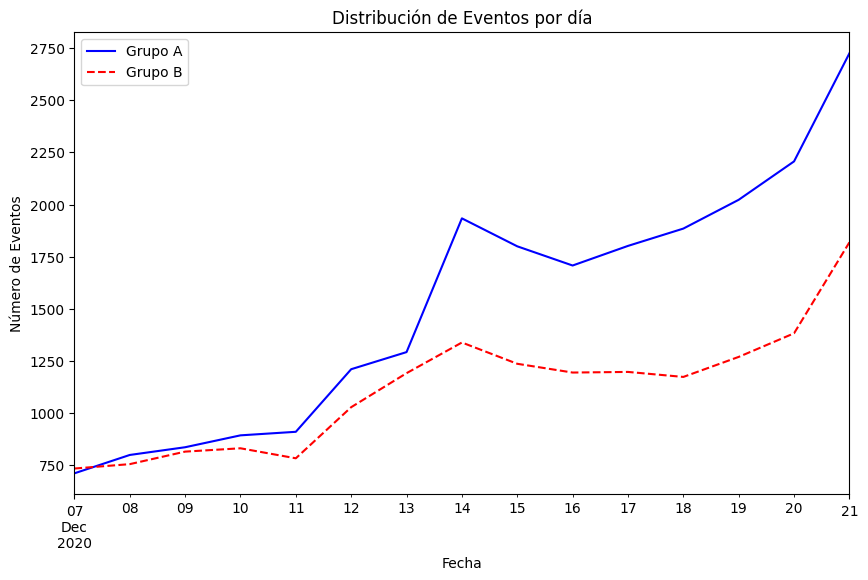

In [71]:
#Se hace merge de dataframes

events_with_groups = events_clean_filtered.merge(participants, on='user_id')

#Se agrupa por fecha y grupo

events_by_group = events_with_groups.groupby(['date', 'group'])['user_id'].count().unstack()

#Se grafican distribucion de eventos por día por grupo

events_by_group.plot(
    figsize=(10, 6), 
    kind='line',
    title='Distribución de Eventos por día',
    xlabel='Fecha',
    ylabel='Número de Eventos',
    color=['blue', 'red'],
    style=['-', '--']
)
plt.legend(['Grupo A', 'Grupo B'])  # Leyenda más descriptiva
plt.show()


In [72]:
#Se calculan usuarios únicos por grupo, evento y dia

funnel_order = ['product_page', 'product_cart', 'purchase']

#Se convierte event_name a categorical con el orden deseado
events_with_groups['event_name'] = pd.Categorical(
    events_with_groups['event_name'], 
    categories=funnel_order, 
    ordered=True
)

pivot_events = events_with_groups.groupby(['group', 'event_name', 'date'])['user_id'].nunique().reset_index()
pivot_events = pivot_events.pivot(index=['group','event_name'], columns='date', values='user_id')
pivot_events

date                2020-12-07  2020-12-08  2020-12-09  2020-12-10  \
group event_name                                                     
A     product_page         361         417         409         427   
      product_cart         150         168         190         210   
      purchase             178         195         211         232   
B     product_page         351         358         387         407   
      product_cart         170         189         215         211   
      purchase             192         193         188         198   

date                2020-12-11  2020-12-12  2020-12-13  2020-12-14  \
group event_name                                                     
A     product_page         442         584         639         933   
      product_cart         215         308         308         445   
      purchase             232         296         326         489   
B     product_page         397         495         565         635   
      product_cart         192         268         300         346   
      purchase             183         251         302         346   

date                2020-12-15  2020-12-16  2020-12-17  2020-12-18  \
group event_name                                                     
A     product_page         855         804         845         899   
      product_cart         443         399         433         437   
      purchase             426         440         428         446   
B     product_page         609         567         581         565   
      product_cart         306         303         292         307   
      purchase             303         298         293         282   

date                2020-12-19  2020-12-20  2020-12-21  
group event_name                                        
A     product_page         952        1012        1298  
      product_cart         489         515         605  
      purchase             495         566         684  
B     product_page         623         677         884  
      product_cart         325         344         470  
      purchase             294         344         444

In [73]:
conversion_data_clean = events_with_groups.groupby(['group', 'event_name'])['user_id'].nunique().reset_index()
conversion_data_clean.columns = ['group', 'event_name', 'unique_users']
print(conversion_data_clean)

  group    event_name  unique_users
0     A  product_page          4601
1     A  product_cart          2207
2     A      purchase          2385
3     B  product_page          3374
4     B  product_cart          1741
5     B      purchase          1707


In [74]:
#Se crear una tabla pivotada para facilitar los cálculos de conversión la la información limpia

conversion_pivot_clean = conversion_data_clean.pivot(index='event_name', columns='group', values='unique_users')
print("Usuarios únicos por etapa:")
conversion_pivot_clean

Usuarios únicos por etapa:


group,A,B
event_name,,
product_page,4601,3374
product_cart,2207,1741
purchase,2385,1707


In [75]:
# Se calculan las tasas de conversión para cada grupo con información limpia

# Grupo A

page_to_cart_A_clean = conversion_pivot_clean.loc['product_cart', 'A'] / conversion_pivot_clean.loc['product_page', 'A']
cart_to_purchase_A_clean = conversion_pivot_clean.loc['purchase', 'A'] / conversion_pivot_clean.loc['product_cart', 'A']
overall_A_clean = conversion_pivot_clean.loc['purchase', 'A'] / conversion_pivot_clean.loc['product_page', 'A']

# Grupo B

page_to_cart_B_clean = conversion_pivot_clean.loc['product_cart', 'B'] / conversion_pivot_clean.loc['product_page', 'B']
cart_to_purchase_B_clean = conversion_pivot_clean.loc['purchase', 'B'] / conversion_pivot_clean.loc['product_cart', 'B']
overall_B_clean = conversion_pivot_clean.loc['purchase', 'B'] / conversion_pivot_clean.loc['product_page', 'B']

In [76]:
print("=== TASAS DE CONVERSIÓN CLEAN===")
print(f"Grupo A Clean:")
print(f"  Página → Carrito: {page_to_cart_A_clean:.1%}")
print(f"  Carrito → Compra: {cart_to_purchase_A_clean:.1%}")
print(f"  General (Página → Compra): {overall_A_clean:.1%}")
print()
print(f"Grupo B Clean:")
print(f"  Página → Carrito: {page_to_cart_B_clean:.1%}")
print(f"  Carrito → Compra: {cart_to_purchase_B_clean:.1%}")
print(f"  General (Página → Compra): {overall_B_clean:.1%}")

=== TASAS DE CONVERSIÓN CLEAN===
Grupo A Clean:
  Página → Carrito: 48.0%
  Carrito → Compra: 108.1%
  General (Página → Compra): 51.8%

Grupo B Clean:
  Página → Carrito: 51.6%
  Carrito → Compra: 98.0%
  General (Página → Compra): 50.6%


In [77]:
print("=== TASAS DE CONVERSIÓN ===")
print(f"Grupo A:")
print(f"  Página → Carrito: {page_to_cart_A:.1%}")
print(f"  Carrito → Compra: {cart_to_purchase_A:.1%}")
print(f"  General (Página → Compra): {overall_A:.1%}")
print()
print(f"Grupo B:")
print(f"  Página → Carrito: {page_to_cart_B:.1%}")
print(f"  Carrito → Compra: {cart_to_purchase_B:.1%}")
print(f"  General (Página → Compra): {overall_B:.1%}")

=== TASAS DE CONVERSIÓN ===
Grupo A:
  Página → Carrito: 47.9%
  Carrito → Compra: 107.7%
  General (Página → Compra): 51.6%

Grupo B:
  Página → Carrito: 51.2%
  Carrito → Compra: 98.2%
  General (Página → Compra): 50.3%


Despúes de analizar la distribución del número de eventos a lo largo de los días con la información sin usuarios comunes podemos confirmar el comportamiento de compra directa, que hay usuarios que compran sin agregar al carrito (tasas de conversión carrito→compra > 100%).

La conversión general es similar con y sin usuarios comunes, ambos grupos tienen tasas de conversión muy cercanas (~51-52%)

Y tambien comprobamos que la distribución es equilibrada; los datos muestran que ambos grupos tienen comportamientos comparables


### Se identifican posibles peculiaridades en los datos que deban considerarse antes de iniciar la prueba A/B

A lo largo del análisis hemos identificado estas peculiaridades:

1. Usuarios que compran sin agregar al carrito
    - Evidencia: La tasas de conversión carrito→compra > 100% (108.1% Grupo A, 98.0% Grupo B)
    - Implicación: Algunos usuarios van directamente de product_page a purchase

2. Usuarios presentes en ambos grupos
    - Evidencia: Se encontrantraron usuarios duplicados entre grupos A y B
    - Implicación: Viola el principio básico de pruebas A/B (un usuario solo debe estar en un grupo)

3. Conversión general muy similar entre grupos
    - Evidencia: ~51.8% vs ~50.6% de conversión general
    - Implicación: Podría indicar que el nuevo sistema no tiene el impacto esperado

Antes de continuar, revisaremos si los eventos de Marketing podrian haber afectado el desarrollo de la prueba.

In [78]:
#Se filtra la informacion de los eventos para la region EU

eu_events = mkt_events[mkt_events['regions'].str.contains('EU')]
eu_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10


In [79]:
pivot_mkt_events = eu_events.groupby(['name', 'start_dt'])['regions'].nunique().reset_index()
pivot_mkt_events = eu_events.pivot(index=['name'], columns='start_dt', values='regions').fillna('')
pivot_mkt_events

start_dt,2020-02-14,2020-03-08,2020-03-17,2020-04-12,2020-05-01,2020-11-26,2020-12-25
name,,,,,,,
Black Friday Ads Campaign,,,,,,"EU, CIS, APAC, N.America",
Christmas&New Year Promo,,,,,,,"EU, N.America"
Easter Promo,,,,"EU, CIS, APAC, N.America",,,
International Women's Day Promo,,"EU, CIS, APAC",,,,,
Labor day (May 1st) Ads Campaign,,,,,"EU, CIS, APAC",,
St. Patric's Day Promo,,,"EU, N.America",,,,
St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",,,,,,


Se analizó el calendario de eventos de marketing para ver si esto podria afectar la prueba, pero ninguna campaña esta activa durante el periodo en que se realizó la prueba y la más cercana inicio 4 días despues de finalizada la prueba por lo cual podemos seguir con el análisis.

## Parte 3. Evaluar los resultados de la prueba A/B

### Se analizan los resultados obtenidos de la prueba A/B

In [80]:
#Se calculan los usuarios por cada grupo

users_per_group = events_with_groups.pivot_table(
    index = 'group',
    values = 'user_id',
    aggfunc = 'nunique'
)
users_per_group

,user_id
group,
A,5864
B,4363


In [81]:
#Se visualizan usuarios por evento por grupo

conversion_pivot_clean

group,A,B
event_name,,
product_page,4601,3374
product_cart,2207,1741
purchase,2385,1707


Conversión: usuarios totales → product_page

In [82]:
#Se calcula las conversiones por grupo por etapa del embudo usuarios totales → product_page

conv_A_total_to_page = (
    conversion_pivot_clean.loc['product_page', 'A'] /
    users_per_group.loc['A', 'user_id']
)


In [83]:
#Se calcula las conversiones por grupo por etapa del embudo usuarios totales → product_page

conv_B_total_to_page = (
    conversion_pivot_clean.loc['product_page', 'B'] /
    users_per_group.loc['B', 'user_id']
)

Conversión: product_page → product_cart

In [84]:
#Se calcula las conversiones por grupo por etapa del embudo product_page → product_cart

conv_A_page_to_cart = (
    conversion_pivot_clean.loc['product_cart', 'A'] /
    conversion_pivot_clean.loc['product_page', 'A']
)

In [85]:
#Se calcula las conversiones por grupo por etapa del embudo product_page → product_cart

conv_B_page_to_cart = (
    conversion_pivot_clean.loc['product_cart', 'B'] /
    conversion_pivot_clean.loc['product_page', 'B']
)

Conversión: product_cart → purchase

In [86]:
#Se calcula las conversiones por grupo por etapa del embudo product_cart → purchase

conv_A_cart_to_purchase = (
    conversion_pivot_clean.loc['purchase', 'A'] /
    conversion_pivot_clean.loc['product_cart', 'A']
)

In [87]:
#Se calcula las conversiones por grupo por etapa del embudo product_cart → purchase

conv_B_cart_to_purchase = (
    conversion_pivot_clean.loc['purchase', 'B'] /
    conversion_pivot_clean.loc['product_cart', 'B']
)

In [88]:
#Se muestran los resultados

conversion_rates = pd.DataFrame({
    'A': [
        conv_A_total_to_page,
        conv_A_page_to_cart,
        conv_A_cart_to_purchase
    ],
    'B': [
        conv_B_total_to_page,
        conv_B_page_to_cart,
        conv_B_cart_to_purchase
    ]
}, index=[
    'Total → Product Page',
    'Product Page → Cart',
    'Cart → Purchase'
])

conversion_rates


,A,B
Total → Product Page,0.784618,0.773321
Product Page → Cart,0.479678,0.516005
Cart → Purchase,1.080652,0.980471


Al hacer el análisis de las tasas de conversión podemos observar lo siguiente:

 - En la primera etapa del embudo, la diferencia es mininima entre los grupos evaluados: Total → Product Page: A (78.5%) vs B (77.3%)
 - En la segunda etapa del embudo, vemos un mejor desempeño en el grupo B: Product Page → Cart: A (48.0%) vs B (51.6%)
 - En la etapa final del embudo, el desempeño del grupo A es mejor: Cart → Purchase: A (108.1%) vs B (98.0%)
   
  Observación clave: La tasa >100% en "Cart → Purchase" de grupo A confirma la peculiaridad encontrada en el punto anterior: Algunos usuarios compran sin pasar por el carrito.

In [89]:
#Se calcula la conversión general total para cada grupo Total → Purchase

conv_A_total_to_purchase = (
    conversion_pivot_clean.loc['purchase', 'A'] /
    users_per_group.loc['A', 'user_id']
)

conv_B_total_to_purchase = (
    conversion_pivot_clean.loc['purchase', 'B'] /
    users_per_group.loc['B', 'user_id']
)

In [90]:
conv_A_total_to_purchase

0.40671896316507505

In [91]:
conv_B_total_to_purchase

0.3912445564978226

Al hacer el resumen de conversiones Total → Purchase esto es lo que encontramos:
 - Grupo A: 40.67% (2385/5864)
 - Grupo B: 39.12% (1707/4363)
 - Diferencia: 1.55 puntos porcentuales a favor de A

### Se utiliza una prueba z para evaluar la existencia de una diferencia estadísticamente significativa entre las proporciones

Para hacer el análisis de la prueba A/B tenemos las siguientes hipótesis a evaluar:

- H₀ (nula): No hay diferencia entre las proporciones (p_A = p_B)
- H₁ (alternativa): Hay diferencia entre las proporciones (p_A ≠ p_B)

In [92]:
#Se calcula la proporción combinada

p_combined = (conversion_pivot_clean.loc['purchase', 'A'] + conversion_pivot_clean.loc['purchase', 'B']) / (users_per_group.loc['A','user_id'] + users_per_group.loc['B','user_id'])
print(p_combined)

0.4001173364623057


In [93]:
#Se calcula el error estándar

se = math.sqrt(p_combined * (1 - p_combined) * (1/users_per_group.loc['A','user_id'] + 1/users_per_group.loc['B','user_id']))
print(f"Error estándar: {se}")

Error estándar: 0.00979515653461531


In [94]:
#Se calcula el estadístico z

p1 = conversion_pivot_clean.loc['purchase', 'A'] / users_per_group.loc['A', 'user_id']
p2 = conversion_pivot_clean.loc['purchase', 'B'] / users_per_group.loc['B', 'user_id']

z_stat = (p1 - p2) / se
print(f"Estadístico z: {z_stat}")

Estadístico z: 1.5798018758114931


In [95]:
# Conclusión de la prueba z

print("=== RESULTADOS DE LA PRUEBA Z ===")
print(f"Estadístico z: {z_stat:.4f}")
print(f"Valor crítico (α=0.05, bilateral): ±1.96")
print(f"Resultado: No hay diferencia estadísticamente significativa")
print(f"Conclusión: Los grupos A y B tienen tasas de conversión similares")

=== RESULTADOS DE LA PRUEBA Z ===
Estadístico z: 1.5798
Valor crítico (α=0.05, bilateral): ±1.96
Resultado: No hay diferencia estadísticamente significativa
Conclusión: Los grupos A y B tienen tasas de conversión similares


Con estos calculos podemos decir que el estadístico z cae dentro del rango [-1.96, +1.96]:
- No se rechazas la hipótesis nula
- No hay diferencia estadísticamente significativa entre los grupos A y B
- La diferencia observada (40.67% vs 39.12%) podría deberse al azar

## Parte 4. Describe tus conclusiones con respecto a la etapa EDA y los resultados de la prueba A/B.

Después de analizar la información proporcionada por el equipo anterior y de ejecutar la prueba A/B en la tienda en línea internacional, se presenta el siguiente informe de resultados.

Los resultados indican que la prueba **no cumplió** con el objetivo esperado. En particular, la implementación del sistema de recomendaciones mejorado no logró un incremento mínimo del 10 % en cada una de las etapas del embudo (*product_page* → *product_cart* → *purchase*), tal como se definió en el propósito inicial del experimento.

Si bien se observa una mejora en el desempeño del grupo 'B' en la transición de página de producto a carrito, con una tasa de conversión del **51.6%**, lo que representa un incremento del **3.6 %** respecto al grupo 'A', este aumento no alcanza el umbral establecido del **10 %**. Además, en la etapa final del embudo (carrito → compra), el grupo 'A' presentó un mejor desempeño que el grupo 'B', lo que indica que el efecto positivo del nuevo sistema de recomendaciones no se mantiene a lo largo de todo el flujo de conversión.

Dado que el grupo 'B' solo mostró una mejora parcial en una de las etapas del embudo, no se recomienda implementar el sistema de recomendaciones en su estado actual. Se considera necesario recopilar más datos y realizar ajustes adicionales antes de tomar una decisión definitiva sobre su despliegue en producción.

Durante el análisis exploratorio de datos se identificó una anomalía relevante: la tasa de conversión en la etapa carrito → compra del grupo 'A' supera el **100 %** (**108.1 %**). Este comportamiento sugiere que una parte de los usuarios realiza compras directamente desde la página de producto, sin pasar por el carrito. Por lo tanto, se recomienda analizar de forma independiente el flujo alternativo product_page → purchase, ya que una optimización en este camino podría generar un impacto positivo en la conversión total.

**Recomendaciones para futuras pruebas**

- Datos temporales

Se recomienda extender la duración de la prueba a al menos 7 semanas para identificar tendencias más claras.

Asimismo, es importante ejecutar la prueba en periodos libres de campañas de marketing activas o temporadas atípicas (vacaciones, feriados, eventos especiales), con el fin de aislar el efecto real del sistema de recomendaciones.

 - Datos de segmentación

Se sugiere analizar el comportamiento por tipo de usuario (nuevos vs. recurrentes) y, de ser posible, incorporar variables demográficas.

Es previsible que los usuarios recurrentes presenten patrones de compra más definidos, mientras que los usuarios nuevos tienden a comportarse de manera más cautelosa, lo que puede influir en los resultados de conversión.

 - Datos cualitativos

Finalmente, se recomienda complementar el análisis cuantitativo con encuestas de satisfacción del usuario.

Factores como la percepción de la marca, la familiaridad con la plataforma y la respuesta a estímulos visuales o recomendaciones personalizadas pueden influir significativamente en los hábitos de compra.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - Las conclusiones están bien redactadas, conectan de forma coherente el EDA con los resultados estadísticos y reflejan una comprensión clara del objetivo del experimento. La interpretación es equilibrada, realista y alineada con los datos, lo que demuestra madurez analítica al traducir métricas en decisiones de negocio fundamentadas.
</div>
